In [1]:
from fastai.vision.all import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from fastai.callback.tracker import SaveModelCallback, EarlyStoppingCallback
from fastai.interpret import ClassificationInterpretation
import matplotlib.pyplot as plt


In [2]:
# Пути к файлам CSV
train_csv_path = "train_data.csv"
test_csv_path = "test_data.csv"

# Загрузка данных
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Путь к папке с изображениями
path = Path('')

In [3]:
print("Длина обучающего набора данных:", len(train_data))
print("Длина тестового набора данных:", len(test_data))

Длина обучающего набора данных: 6194
Длина тестового набора данных: 1554


In [4]:
# Создание DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=ColReader('image_path', pref=path),
                   get_y=ColReader('label'),
                   splitter=RandomSplitter())

In [5]:
# Создание DataLoaders
dls = dblock.dataloaders(train_data, bs=64)

In [6]:
# Создание модели
learn = cnn_learner(dls, resnet34, metrics=accuracy)

C:\Users\14488\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Обучение модели с помощью метода fine_tune

In [7]:
# Определение пути для сохранения модели
model_save_path = "fine_tune"

# Определение коллбэка EarlyStopping
early_stopping_cb = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)

# Определение коллбэка SaveModel
save_model_cb = SaveModelCallback(monitor='valid_loss', fname='best_model')

# Создание объекта Learner и передача коллбэков EarlyStoppingCallback и SaveModelCallback
learn = Learner(dls, learn.model, loss_func=learn.loss_func, cbs=[early_stopping_cb, save_model_cb])

# Вызов метода fit для модели с добавлением всех коллбэков
learn.fit_one_cycle(n_epoch=2, cbs=[early_stopping_cb, save_model_cb])  


epoch,train_loss,valid_loss,time
0,2.317620,1.465326,12:39
1,1.610597,1.345714,12:55


Better model found at epoch 0 with valid_loss value: 1.465325951576233.
Better model found at epoch 1 with valid_loss value: 1.34571373462677.


In [8]:
# Сохранение модели
learn.export(fname=model_save_path)

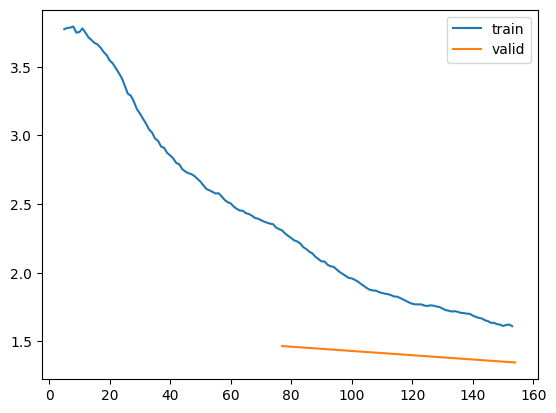

In [9]:
# График потерь (Loss Plot): Это график, показывающий изменение потерь (loss) на обучающем 
# и валидационном наборах данных в течение эпох обучения. 
# Можно использовать метод Recorder.plot_loss() для визуализации этого графика.

learn.recorder.plot_loss()

In [12]:
# Матрица ошибок (Confusion Matrix): Матрица ошибок позволяет визуализировать,
# какие классы модель чаще всего путает между собой. 
# Для построения матрицы ошибок можно использовать класс ClassificationInterpretation.

# Создание интерпретации модели
interp = ClassificationInterpretation.from_learner(learn)

In [11]:
# Построение матрицы ошибок
interp.plot_confusion_matrix()

NameError: name 'interp' is not defined

In [ ]:
# Визуализация предсказаний (Prediction Visualization): 
# Можно визуализировать предсказания модели на тестовом наборе данных, 
# например, с помощью графиков с предсказанными и фактическими метками.

interp.plot_top_losses(k=4)  # Показать примеры наиболее ошибочных предсказаний

In [ ]:
# Визуализация результатов на изображениях:
# Можно также визуализировать результаты модели на конкретных изображениях, 
# например, показать исходное изображение с предсказанной меткой.

interp.plot_top_losses(k=1, largest=True)  # Показать пример наиболее ошибочного предсказания

In [ ]:
# Получение прогнозов (предсказаний) модели на тестовых данных
predictions = learn.get_preds(dl=test_data)

# Предсказания модели являются вторым элементом кортежа predictions
predicted_labels = predictions[0].argmax(dim=1) # Получение индекса класса с наибольшей вероятностью

true_labels = test_data['label'] 

accuracy_fine_tune = accuracy_score(true_labels, predicted_labels)

print("Accuracy on test data fine_tune:", accuracy_fine_tune)

Обучение модели с помощью метода fit_one_cycle

In [ ]:
# Определение пути для сохранения модели
model_save_path = "fit_one_cycle"

# Определение коллбэка EarlyStopping
early_stopping_cb = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)

# Определение коллбэка SaveModel
save_model_cb = SaveModelCallback(monitor='valid_loss', fname='best_model')

# Создание объекта Learner и передача коллбэков EarlyStoppingCallback и SaveModelCallback
learn = Learner(dls, learn.model, loss_func=learn.loss_func, cbs=[early_stopping_cb, save_model_cb])

# Вызов метода fit для модели с добавлением всех коллбэков
learn.fit_one_cycle(n_epoch=2, cbs=[metrics_callback, early_stopping_cb, save_model_cb])  

In [ ]:
# Сохранение модели
learn.export(fname=model_save_path)

In [ ]:
# График потерь (Loss Plot): Это график, показывающий изменение потерь (loss) на обучающем 
# и валидационном наборах данных в течение эпох обучения. 
# Можно использовать метод Recorder.plot_loss() для визуализации этого графика.

learn.recorder.plot_loss()

In [ ]:
# Матрица ошибок (Confusion Matrix): Матрица ошибок позволяет визуализировать,
# какие классы модель чаще всего путает между собой. 
# Для построения матрицы ошибок можно использовать класс ClassificationInterpretation.

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [ ]:
# Визуализация предсказаний (Prediction Visualization): 
# Можно визуализировать предсказания модели на тестовом наборе данных, 
# например, с помощью графиков с предсказанными и фактическими метками.

interp.plot_top_losses(k=4)  # Показать примеры наиболее ошибочных предсказаний


In [ ]:
# Визуализация результатов на изображениях:
# Можно также визуализировать результаты модели на конкретных изображениях, 
# например, показать исходное изображение с предсказанной меткой.

interp.plot_top_losses(k=1, largest=True)  # Показать пример наиболее ошибочного предсказания

In [ ]:
# Получение прогнозов (предсказаний) модели на тестовых данных
predictions = learn.get_preds(dl=test_data)

# Предсказания модели являются вторым элементом кортежа predictions
predicted_labels = predictions[0].argmax(dim=1) # Получение индекса класса с наибольшей вероятностью

true_labels = test_data['label'] 

accuracy_fit_one_cycle = accuracy_score(true_labels, predicted_labels)

print("Accuracy on test data fine_tune:", accuracy_fit_one_cycle)